In [97]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import tree, cross_validation, datasets, metrics, ensemble

In [9]:
data=datasets.load_digits()
X=data.data
y=data.target


In [22]:
pine=tree.DecisionTreeClassifier()

In [27]:
qulity_ar=cross_validation.cross_val_score(pine,X,y, cv=10)
qulity=qulity_ar.mean()
qulity
with open("4week_answer1.txt", "w") as fout:
        fout.write(str(qulity))

In [68]:
benks= ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=100)
qulity_ar=cross_validation.cross_val_score(benks,X,y, cv=10)

In [69]:
qulity2=qulity_ar.mean()
qulity2
with open("4week_answer2.txt", "w") as fout:
        fout.write(str(qulity2))

In [70]:
abs=np.sqrt(X.shape[1])
benks= ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(), n_estimators=100,  max_features=int(X.shape[1]**0.5), bootstrap_features=True)

In [71]:
qulity3=(cross_validation.cross_val_score(benks,X,y, cv=10)).mean()
qulity3

0.926548064118804

In [72]:
with open("4week_answer3.txt", "w") as fout:
        fout.write(str(qulity3))

In [76]:
benks= ensemble.BaggingClassifier(base_estimator=tree.DecisionTreeClassifier(max_features=int(X.shape[1]**0.5)),n_estimators=100, 
                                  bootstrap_features=True)
qulity4=(cross_validation.cross_val_score(benks,X,y, cv=10)).mean()
qulity4
with open("4week_answer4.txt", "w") as fout:
        fout.write(str(qulity4))

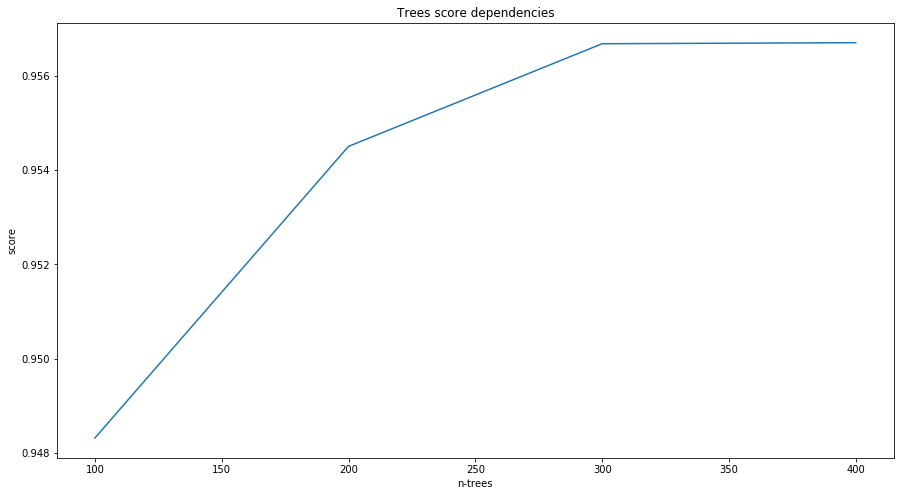

In [99]:
#пятое задание
%matplotlib inline
def fit_estimator(estimator):
    return cross_validation.cross_val_score(estimator, X, y, cv=10).mean()

def plot_rf_trees_score():      
    trees = [100, 200, 300, 400]
    results = []
    for tree in trees:
        rf = ensemble.RandomForestClassifier(n_estimators=tree)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(trees, results)
    plt.xlabel("n-trees")
    plt.ylabel("score")
    plt.title("Trees score dependencies")
    plt.show()
plot_rf_trees_score()

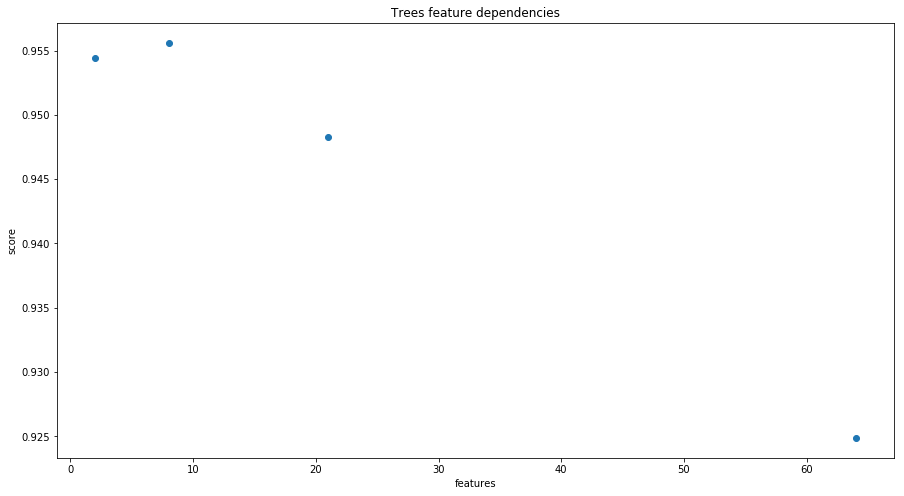

In [100]:

def plot_rf_trees_max_features():
    d = X.shape[1]
    features = [2, int(np.sqrt(d)), int(d/3), d]
    results = []
    for f in features:
        rf = ensemble.RandomForestClassifier(n_estimators=400, random_state=101, max_features=f)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(features, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees feature dependencies")
    plt.show()
plot_rf_trees_max_features()

In [98]:
def plot_rf_tree_depth():
    d = X.shape[1]
    depth = [2, 4, 6, 8]
    results = []
    for d in depth:
        rf = RandomForestClassifier(n_estimators=400, random_state=101, max_depth=d)
        results.append(fit_estimator(rf))
    plt.figure(figsize=(15, 8))
    plt.plot(depth, results, 'o')
    plt.xlabel("features")
    plt.ylabel("score")
    plt.title("Trees depth dependencies")
    plt.show()
plot_rf_tree_depth() 

<Figure size 1080x576 with 0 Axes>

<Figure size 1080x576 with 0 Axes>